In [ ]:
# To help with reading and manipulation of data
import numpy as np
import pandas as pd

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# to create pipeline and make_pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# to use standard scaler
from sklearn.preprocessing import StandardScaler

# To impute missing values
from sklearn.impute import SimpleImputer

# To build a Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# To suppress warnings
import warnings

warnings.filterwarnings("ignore")
df = pd.read_csv('Cardiac.csv')

In [ ]:
def ConvertColTo(toType, column_names=np.nan, df = np.nan):
    for col_name in column_names:
        if col_name != 'TARGET':
            df[col_name] = df[col_name].astype(toType)

ConvertColTo("category", ['UnderRisk', 'Gender'], df)
df.info()

In [ ]:
# Functions to calculate different metrics

def DisplayConfusionMatrix(model, y_actual, labels=[1,0]):
    y_predict             = model.predict(x_test)
    confusion_matrix      = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    
    confusion_matix_df = pd.DataFrame(
        data    = confusion_matrix,
        index   = [i for i in ["Actual No", "Actual Yes"]],
        columns = [i for i in ["Predicted - No", "Predicted - Yes"]])
    
    group_counts     = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
    group_percetages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percetages)]
    labels = np.array(labels).reshape(2, 2)
    plt.figure(figsize= (10,7))
    sns.heatmap(confusion_matix_df, annot=labels,fmt='')
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    
def GetMetricsScore(model):
    
    pred_train      = model.predict(x_train)
    pred_test       = model.predict(x_test)
    
    train_accuracy  = model.score(x_train, y_train)
    test_accuracy   = model.score(x_test, y_test)
    
    train_recall    = metrics.recall_score(y_train, pred_train)
    test_recall     = metrics.recall_score(y_test, pred_test)
    
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision  = metrics.precision_score(y_test, pred_test)

    f1_score_train  = 2 * ((train_precision * train_recall)/(train_precision + train_recall))
    f1_score_test   = 2 * ((test_precision * test_recall)/(test_precision + test_recall))
    
    return {
        'Accuracy_Test'   : test_accuracy,
        'Accuracy_Train'  : train_accuracy,
        'Recall_Test'     : test_recall,
        'Recall_Train'    : train_recall,
        'Precision_Test'  : test_precision,
        'Precision_Train' : train_precision,
        'F1_Score_Train'  : f1_score_train,
        'F1_Score_Test'   : f1_score_test
    }
        

def DisplayImportance(model):
    gini_importances = pd.DataFrame(
        data    = model.feature_importances_, 
        columns = ["Imp"],
        index   = x_train.columns).sort_values(by = "Imp")
    
    print(gini_importances)
    
def DisplayImportanceChart(model):
    importances = model.feature_importances_
    indices     = np.argsort(importances)

    plt.figure(figsize=(12, 12))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [list(X.columns)[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
def PlotTree(model, size= [20, 30]):
    plt.figure(figsize=(size[0],size[1]))
    tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize=9, node_ids=True, class_names=True)
    plt.show()
    
def PrintCoeficients(model):
    coefs = pd.DataFrame(
        np.append(model.coef_, model.intercept_),
        index=x_train.columns.tolist() + ["Intercept"],
        columns=["Coefficients"],
    )

    coefs.sort_values('Coefficients')

In [ ]:
oneHotCols = df.select_dtypes(include=['category']).columns.tolist()
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

replace_struct = {
    "UnderRisk"            : {"no":0, "yes":1}
}
df = df.replace(replace_struct)

# separating data into X and Y
X = df.drop(['UnderRisk'], axis = 1)
y = df['UnderRisk']

# first we split data into 2 parts, say temporary and test
x_temp, x_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

# then we split the temporary set into train and validation
x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp, test_size=0.25, random_state=5, stratify=y_temp
)

print(x_train.shape, x_temp.shape, x_test.shape)

In [ ]:
df.info()

In [ ]:
from sklearn.linear_model import LogisticRegression

# fit model on train
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(x_train,y_train)

In [7]:
coefs = pd.DataFrame(
    np.append(logistic_reg_model.coef_, logistic_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coefs.sort_values('Coefficients')

,Coefficients
Intercept,-3.561706
Chain_smoker,-1.314107
History_of_preeclampsia,-0.996345
CABG_history,-0.697155
Gender_Other,-0.310002
Diabetes,-0.129396
Obese,-0.110623
Use_of_stimulant_drugs,-0.040443
Respiratory_illness,0.063715
Metabolic_syndrome,0.192941


In [8]:
import pprint

main_data = df

logistic_reg_model_score = GetMetricsScore(logistic_reg_model)
pprint.pprint(logistic_reg_model_score)

{'Accuracy_Test': 0.7865168539325843,
 'Accuracy_Train': 0.7861163227016885,
 'F1_Score_Test': nan,
 'F1_Score_Train': nan,
 'Precision_Test': 0.0,
 'Precision_Train': 0.0,
 'Recall_Test': 0.0,
 'Recall_Train': 0.0}


In [9]:
'''
Input:
N/A

Output:
Go through each categorial column and print unique values for that column.

Retunrs:
N/A
'''
def CountUniqueValues(col_names):
    for col_name in col_names:
        print(f"======================='{col_name}'==================")
        for unique_col_value in  main_data[col_name].unique().tolist():
            total_count = main_data[col_name].count()
            unique_values_count = main_data[main_data[col_name] == unique_col_value][col_name].count()
            percentage = str(round((unique_values_count/total_count) * 100, 2))
            print(f"{unique_col_value} \t: {unique_values_count} ({percentage}%)")
        print(f"=========================================================\n")

catgry_col_names = main_data.select_dtypes(include=['category']).columns.tolist()
CountUniqueValues(catgry_col_names)
CountUniqueValues(['UnderRisk'])

======================='UnderRisk'==================
0 	: 699 (78.63%)
1 	: 190 (21.37%)



In [10]:
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)

In [12]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(x_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))


Before OverSampling, count of label '1': 114
Before OverSampling, count of label '0': 419 

After OverSampling, count of label '1': 419
After OverSampling, count of label '0': 419 

After OverSampling, the shape of train_X: (838, 13)
After OverSampling, the shape of train_y: (838,) 



In [15]:
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(x_train_over,y_train_over)

logistic_reg_model_score = GetMetricsScore(logistic_reg_model)
pprint.pprint(logistic_reg_model_score)

{'Accuracy_Test': 0.6067415730337079,
 'Accuracy_Train': 0.6153846153846154,
 'F1_Score_Test': 0.375,
 'F1_Score_Train': 0.4444444444444445,
 'Precision_Test': 0.28378378378378377,
 'Precision_Train': 0.3215686274509804,
 'Recall_Test': 0.5526315789473685,
 'Recall_Train': 0.7192982456140351}


In [17]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(x_train_over,y_train_over)

BaggingClassifier(random_state=1)

In [20]:
pred_train = bagging_estimator.predict(x_train_over)
pred_val = bagging_estimator.predict(x_val)

In [22]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_over, pred_train))
print(recall_score(y_val, pred_val))

0.8066825775656324
0.6578947368421053


In [26]:
# Checking accuracy score on undersampled train and validation set
print(accuracy_score(y_train_over, pred_train))
print(accuracy_score(y_val, pred_val))

0.7028639618138425
0.5842696629213483


In [27]:
# Checking accuracy score on undersampled train and validation set
print(precision_score(y_train_over, pred_train))
print(precision_score(y_val, pred_val))

0.6679841897233202
0.29069767441860467


In [ ]:
logistic_reg_model_score = GetMetricsScore(bagging_estimator)
pprint.pprint(logistic_reg_model_score)

In [ ]:
precision_score

In [28]:
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(x_train_over,y_train_over)

RandomForestClassifier(random_state=1)

In [29]:
pred_train = rf_estimator.predict(x_train_over)
pred_val = rf_estimator.predict(x_val)

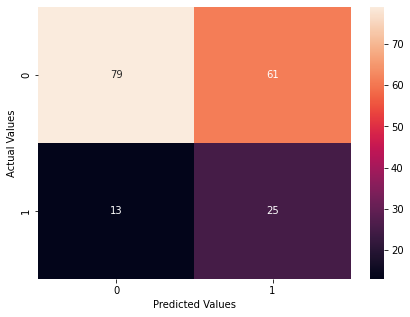

In [32]:
cm = confusion_matrix(y_val, pred_val)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
print(y_test.value_counts(1))

In [34]:
from sklearn.tree import DecisionTreeClassifier

bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(x_train_over,y_train_over)

rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(x_train_over,y_train_over)

logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(x_train_over,y_train_over)

dtree1 = DecisionTreeClassifier(random_state=1, max_depth=4)
dtree1.fit(x_train_over,y_train_over)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [42]:
from sklearn.model_selection import StratifiedKFold
scoring = "recall"

kfold = StratifiedKFold(

    n_splits=5, shuffle=True, random_state=1

)  # Setting number of splits equal to 5

count = 0
print(f" bagging : {cross_val_score(estimator=bagging_estimator, X=x_train_over, y=y_train_over, scoring=scoring, cv=kfold).mean()}")
print(f" RF : {cross_val_score(estimator=rf_estimator, X=x_train_over, y=y_train_over, scoring=scoring, cv=kfold).mean()}")
print(f" log : {cross_val_score(estimator=logistic_reg_model, X=x_train_over, y=y_train_over, scoring=scoring, cv=kfold).mean()}")
print(f" dtree : {cross_val_score(estimator=dtree1, X=x_train_over, y=y_train_over, scoring=scoring, cv=kfold).mean()}")

 bagging : 0.7877796901893287
 RF : 0.792570281124498
 log : 0.7567125645438899
 dtree : 0.7924268502581755


In [51]:
from sklearn.ensemble import AdaBoostClassifier

adaBoostingClassf_Tuned_Model = AdaBoostClassifier(random_state=1)

parameters = {
    "n_estimators": np.arange(10, 110, 10),

    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],

    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),

        DecisionTreeClassifier(max_depth=2, random_state=1),

        DecisionTreeClassifier(max_depth=3, random_state=1),

    ],
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = RandomizedSearchCV(

    estimator=adaBoostingClassf_Tuned_Model,

    param_distributions=parameters,

    n_jobs=-1,

    n_iter=50,

    scoring=scorer,

    cv=5,

    random_state=1,

)

gird_obj = grid_obj.fit(x_train_over,y_train_over)
adaBoostingClassf_Tuned_Model = grid_obj.best_estimator_
adaBoostingClassf_Tuned_Model.fit(x_train_over,y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [52]:
gird_obj.best_params_

{'n_estimators': 50,
 'learning_rate': 0.01,
 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)}

In [55]:
logistic_reg_model_score = GetMetricsScore(adaBoostingClassf_Tuned_Model)
pprint.pprint(logistic_reg_model_score)

{'Accuracy_Test': 0.42134831460674155,
 'Accuracy_Train': 0.37523452157598497,
 'F1_Score_Test': 0.4114285714285715,
 'F1_Score_Train': 0.39783001808318263,
 'Precision_Test': 0.26277372262773724,
 'Precision_Train': 0.2505694760820046,
 'Recall_Test': 0.9473684210526315,
 'Recall_Train': 0.9649122807017544}


In [54]:
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
x_train_un, y_train_un = rus.fit_resample(x_train, y_train)

In [56]:
acc_scorer = metrics.make_scorer(metrics.recall_score)

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = RandomizedSearchCV(

    estimator=adaBoostingClassf_Tuned_Model,

    param_distributions=parameters,

    n_jobs=-1,

    n_iter=50,

    scoring=scorer,

    cv=5,

    random_state=1,

)

gird_obj = grid_obj.fit(x_train_un,y_train_un)
adaBoostingClassf_Tuned_Model = grid_obj.best_estimator_
adaBoostingClassf_Tuned_Model.fit(x_train_un,y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [57]:
logistic_reg_model_score = GetMetricsScore(adaBoostingClassf_Tuned_Model)
pprint.pprint(logistic_reg_model_score)

{'Accuracy_Test': 0.43258426966292135,
 'Accuracy_Train': 0.3883677298311445,
 'F1_Score_Test': 0.4161849710982659,
 'F1_Score_Train': 0.40293040293040294,
 'Precision_Test': 0.26666666666666666,
 'Precision_Train': 0.25462962962962965,
 'Recall_Test': 0.9473684210526315,
 'Recall_Train': 0.9649122807017544}


In [ ]:
# dividing data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify = Y)

In [ ]:
print(Y_test.value_counts(1))

In [ ]:
# pipeline takes a list of tuples as parameter. The last entry is the call to the modeling algorithm
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
])

# "scaler" is the name assigned to StandardScaler
# "clf" is the name assigned to LogisticRegression

In [ ]:
# Any element of the pipeline can be called later using the assigned name
pipeline['scaler'].fit(X_train)

In [ ]:
pipeline.fit(X_train,Y_train)


In [ ]:
pipeline.score(X_train, Y_train)


In [ ]:
pipeline.score(X_test, Y_test)

In [ ]:
pipe = make_pipeline(StandardScaler(), (LogisticRegression())) 


In [ ]:
pipe.steps

In [ ]:
pipe.fit(X_train,Y_train)

In [ ]:
pipe.score(X_train, Y_train)

In [ ]:
pipe.score(X_test, Y_test)